<a href="https://colab.research.google.com/github/atikhasan007/Machine-Learning/blob/main/%20Ensemble%20Learning%20Models/Avocado_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Hey ML fam! Up for a new project? Today, we'll be predicting some avocado prices! It is a well-known fact that Millenials LOVE Avocado Toast. It's also a well-known fact that all Millenials live in their parent's basements.

Clearly, they aren't buying a home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

# About Data
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the [Hass Avocado Board describes the data on their website](http://www.hassavocadoboard.com/retail/volume-and-price-data):

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar, and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLUs) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Evaluation
This project is fairly simple, we'll use some measures like RMSE and similar to these metrics.

As this is just a dataset (And not a Kaggle competition), we'll take 0.2% of our data as our test set, and the rest shall be our training set.

The Dataset / Kaggle Link: https://www.kaggle.com/datasets/neuromusic/avocado-prices

In [ ]:
#pip install xgboost

In [ ]:
# Importing neccasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Pre-Processing Libs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the data
df_avocados = pd.read_csv("avocado.csv", parse_dates=True)
df_avocados

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Remove Unnamed: 0 Column as well as index column
df_avocados = df_avocados.drop(columns=["Unnamed: 0", "Date", "region"])
df_avocados

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018


In [ ]:
# Change 4046, 4225, 4770 to their respective values
df_avocados = df_avocados.rename(columns={"4046":"Small", "4225":"Large", "4770":"XLarge"})

# Move the Average Price column to the last end
df_avocados = df_avocados[['Total Volume', 'Small', 'Large',
       'XLarge', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'AveragePrice']]

In [ ]:
# First 5 rows of the data
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,1.63
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,1.71
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,1.87
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,1.93


# Explorotary Data Analysis

We'll cover the following things:
* Some `information` about the dataset
* Some `description` of the dataset
* Check `null` values
* Some `PLOTS`:
    * Distribution of `Price` (i.e AveragePrice)
    * Distribution of `Volumne` (i.e Total Volume), then also check for `per_annum`.
    * Count of `Hasses`
    * Count of `Bags`
    * Count of `Type`
    * Count of `Year`
    * Count of `Region`

In [ ]:
# Information
df_avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  18249 non-null  float64
 1   Small         18249 non-null  float64
 2   Large         18249 non-null  float64
 3   XLarge        18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   Small Bags    18249 non-null  float64
 6   Large Bags    18249 non-null  float64
 7   XLarge Bags   18249 non-null  float64
 8   type          18249 non-null  object 
 9   year          18249 non-null  int64  
 10  AveragePrice  18249 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
df_avocados.describe()

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice
count,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,1.405978
std,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,0.402677
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.440000
25%,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,1.100000
50%,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,1.370000
75%,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,1.660000
max,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,3.250000


In [ ]:
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,1.63
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,1.71
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,1.87
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,1.93


In [ ]:
# Check for NULL values
df_avocados.isna().sum()

Total Volume    0
Small           0
Large           0
XLarge          0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
AveragePrice    0
dtype: int64

Oh well, that's good. No **NULL** values. So nothing to fix here. Let's One Hot Encode the values via `pd.dummies()`

In [ ]:
# Note: I'm using pd.get_dummies as it is quicker as my main focus is towards dealing with Outliers (THIS SHOULD NOT BE USED IN PRODUCTION LEVEL CODE)
df_avocados = pd.get_dummies(df_avocados, drop_first=True)
df_avocados.shape

(18249, 11)

In [ ]:
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,type_organic
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1.33,False
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1.35,False
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.93,False
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1.08,False
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1.28,False
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,1.63,True
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1.71,True
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1.87,True
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1.93,True


In [ ]:
# Scaling via RobustScaler
scaler = StandardScaler()
scaler.fit(df_avocados)
scale_array = scaler.transform(df_avocados)
scale_array

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -1.22128204,
        -0.18868864, -0.99983562],
       [-0.23042664, -0.23110251, -0.20805446, ..., -1.22128204,
        -0.13901962, -0.99983562],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -1.22128204,
        -1.18206895, -0.99983562],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.97050371,
         1.15237477,  1.00016441],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.97050371,
         1.30138182,  1.00016441],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.97050371,
         0.53151208,  1.00016441]])

In [ ]:
df_avocados.columns

Index(['Total Volume', 'Small', 'Large', 'XLarge', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'AveragePrice', 'type_organic'],
      dtype='object')

In [ ]:
df_avocados = pd.DataFrame(data = scale_array, columns = df_avocados.columns)
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,type_organic
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282,-0.188689,-0.999836
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282,-0.139020,-0.999836
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282,-1.182069,-0.999836
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282,-0.809551,-0.999836
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282,-0.312861,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504,0.556347,1.000164
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504,0.755023,1.000164
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504,1.152375,1.000164
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504,1.301382,1.000164


<Axes: xlabel='Total Volume'>

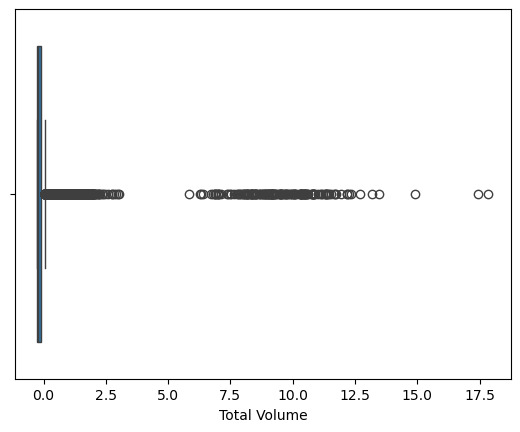

In [ ]:
sns.boxplot(x=df_avocados["Total Volume"])

In [ ]:
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5*IQR
            upper_limit = Q3 + 1.5*IQR

            df[col][df[col] < lower_limit] = lower_limit
            df[col][df[col] > upper_limit] = upper_limit
        else:
            df[col]=df[col]
    return df

In [ ]:
df_avocados = cap_data(df_avocados)
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,type_organic
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282,-0.188689,-0.999836
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282,-0.139020,-0.999836
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282,-1.182069,-0.999836
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282,-0.809551,-0.999836
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282,-0.312861,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504,0.556347,1.000164
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504,0.755023,1.000164
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504,1.152375,1.000164
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504,1.301382,1.000164


<Axes: xlabel='Total Volume'>

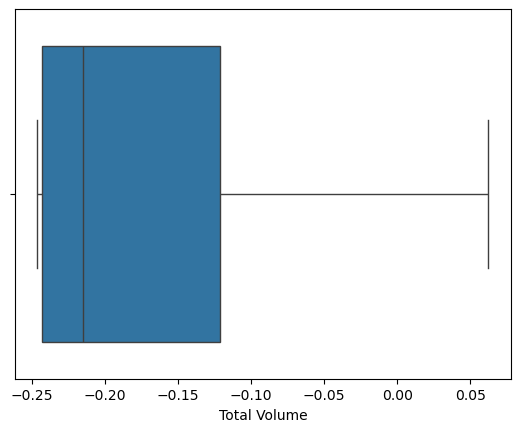

In [ ]:
sns.boxplot(x=df_avocados["Total Volume"])

Well now our data is free of outliers and we can move to the modelling section of our project.

# Modelling
In this part, we'll train our ML model to predict the average price of the avocados. We'll be using the following algorithms:
* Random Forest
* Linear Regression
* XGBoost (Best for Outliers)

Also, I'll use decision trees to get **Feature Importance**

In [ ]:
df_avocados

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,AveragePrice,type_organic
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282,-0.188689,-0.999836
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282,-0.139020,-0.999836
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282,-1.182069,-0.999836
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282,-0.809551,-0.999836
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282,-0.312861,-0.999836
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504,0.556347,1.000164
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504,0.755023,1.000164
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504,1.152375,1.000164
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504,1.301382,1.000164


In [ ]:
features = df_avocados.drop(columns="AveragePrice")
target = df_avocados.AveragePrice

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
16391,-0.244760,-0.231519,-0.244403,-0.212540,-0.238570,-0.238346,-0.222707,-0.175580,0.906575,1.000164
4990,-0.078771,-0.108676,-0.118035,-0.067291,0.009004,-0.050122,0.002229,-0.175580,-0.157353,-0.999836
13653,-0.244444,-0.230034,-0.243027,-0.212540,-0.241047,-0.241699,-0.222463,-0.175580,-0.157353,1.000164
2074,-0.204142,-0.169819,-0.212934,-0.211290,-0.214035,-0.209356,-0.212188,-0.175580,-1.221282,-0.999836
12377,-0.234580,-0.231507,-0.213006,-0.212540,-0.241269,-0.241905,-0.222734,-0.175580,-0.157353,1.000164
...,...,...,...,...,...,...,...,...,...,...
11284,-0.242568,-0.229740,-0.236651,-0.212540,-0.242642,-0.243718,-0.222734,-0.175580,-1.221282,1.000164
11964,-0.245972,-0.231614,-0.244840,-0.212540,-0.242157,-0.243078,-0.222734,-0.175580,-0.157353,1.000164
5390,-0.222165,-0.230851,-0.199491,-0.205383,-0.215920,-0.208399,-0.222734,-0.175580,-0.157353,-0.999836
860,-0.165940,-0.197827,-0.128521,-0.193665,-0.149317,-0.126303,-0.211169,-0.156857,-1.221282,-0.999836


In [ ]:
y_train

16391    1.177209
4990    -1.480083
13653    1.500058
2074    -0.958558
12377    0.308002
           ...   
11284    0.357671
11964    0.357671
5390    -0.238358
860     -0.685379
15795   -0.139020
Name: AveragePrice, Length: 14599, dtype: float64

In [ ]:
# Feature Importance
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
model_dt.score(X_test, y_test)

0.5963298294412633

In [ ]:
# Traing the other 3 models
modelclasses = [
    ["Linear Regression", LinearRegression()],
    ["Decision Tree Regressor", DecisionTreeRegressor()],
    ["Random Forest Regressor", RandomForestRegressor()],
    ["XGBoost Regressor", XGBRegressor()]
]

insights = []

for modelname, Model in modelclasses:
    model = Model
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    insights.append((modelname, score))

In [ ]:
insights.sort(key=lambda x:x[-1], reverse=True)
insights

pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Random Forest Regressor,0.784435
1,XGBoost Regressor,0.763742
2,Decision Tree Regressor,0.600433
3,Linear Regression,0.439206


And there we go, our model results are out! The best seems to be the Random Forest followed by XGboost.